In [1]:
%load_ext autoreload
%autoreload 2

In [33]:
import os
import sys
import glob
from itertools import chain

from tqdm import tqdm_notebook
tqdm = tqdm_notebook

import numpy as np
import pandas as pd

from dvidutils import LabelMapper
from neuclease.util import compute_parallel
from neuclease.dvid import *

In [3]:
from neuclease import configure_default_logging
configure_default_logging()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
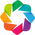

In [82]:
import holoviews as hv
hv.extension('bokeh')
import hvplot.pandas

In [4]:
pwd

'/nrs/flyem/bergs/find-missing-assign-edges'

In [5]:
#
# NOTE:
#
#   This notebook assumes you've got 32 cores, and a lot of RAM.
#   I used an interactive cluster session:
#
#     $ bsub -n 32 -Is /bin/bash
#     $ jupyter notebook --ip=$(uname -n) --no-browser
#

### Load Michal's original adjacency graph
(as numpy structured arrays)

In [6]:
tables = {}
for res in tqdm([32, 16, 8]):
    paths = sorted(glob.glob(f'/nrs/flyem/bergs/complete-ffn-agglo/{res}nm/*.npy'))
    tables[res] = compute_parallel(np.load, paths, processes=32, ordered=False)

In [7]:
all_tables = tables[8] + tables[16] + tables[32]
len(all_tables)

300

### Fetch the complete sv-to-body mapping from DVID

In [8]:
node = ('emdata4:8900', '4158')
seg = (*node, 'segmentation')

In [9]:
mapping = fetch_complete_mappings(*seg)
mapper = LabelMapper(mapping.index.values, mapping.values)

[2019-04-04 14:04:00,471] INFO Reading kafka messages for flatteneddvidrepo-28841c8277e044a7b187dda03e18da13-data-026ee697756443529a314ae15e7c6364 from ['kafka.int.janelia.org:9092', 'kafka2.int.janelia.org:9092', 'kafka3.int.janelia.org:9092']
[2019-04-04 14:04:30,885] INFO Reading 707075 kafka messages took 30.414121389389038 seconds
[2019-04-04 14:04:35,160] INFO Fetching http://emdata4:8900/api/node/4158/segmentation/mappings...
[2019-04-04 14:05:19,324] INFO Fetching http://emdata4:8900/api/node/4158/segmentation/mappings took 0:00:44.162882
[2019-04-04 14:05:19,325] INFO Parsing mapping...
[2019-04-04 14:05:26,980] INFO Parsing mapping took 0:00:07.654653
[2019-04-04 14:05:26,984] INFO Constructing missing identity-mappings...
[2019-04-04 14:05:47,154] INFO Constructing missing identity-mappings took 0:00:20.168876


### Compute body for every supervoxel

In [10]:
def compute_bodies(table):
    # id_a and id_b are supervoxel IDs, but have the wrong type (int64)
    # Cast them to uint64 before mapping (or else LabelMapper gives the wrong results)
    # (Also, xtensor seems to behave badly if we pass it a view from a record array.)
    bodies_a = mapper.apply(table['id_a'].astype(np.uint64), allow_unmapped=True)
    bodies_b = mapper.apply(table['id_b'].astype(np.uint64), allow_unmapped=True)
    return (bodies_a, bodies_b)

In [11]:
body_columns = compute_parallel(compute_bodies, all_tables, threads=32)

### Convert to DataFrame

In [12]:
def make_dataframe(bodies_and_table):
    (bodies_a, bodies_b), table = bodies_and_table
    df = pd.DataFrame(table).rename(columns={'id_a': 'sv_a', 'id_b': 'sv_b'})
    df['body_a'] = bodies_a
    df['body_b'] = bodies_b
    return df

dfs = compute_parallel(make_dataframe, list(zip(body_columns, all_tables)), threads=32)

In [13]:
len(dfs)

300

In [14]:
dfs[0].head()

,sv_a,sv_b,xa,ya,za,xb,yb,zb,caa,cab,cba,cbb,iou,da,db,resolution,body_a,body_b
0,1003672656,1036072162,32861,14993,14691,32876,14994,14633,0.534206,0.0,0.006223,0.915006,0.000000,0.009294,0.000000,8,941482720,1036072162
1,1003737064,1003737067,5094,13662,13984,5094,13665,13985,1.000000,1.0,1.000000,1.000000,0.469598,0.008945,0.068597,8,1003737064,1003737067
2,1004009820,1004010046,32675,13683,14230,32705,13701,14240,0.883673,0.0,0.019550,0.990561,0.000000,0.000772,0.006908,8,911919917,1004010046
3,1004666175,1004666281,29932,14799,14296,29915,14804,14344,0.981021,0.0,0.000000,0.851917,0.000000,0.015227,0.000184,8,1004666175,1004666281
4,1005088614,1005434591,3963,15721,14147,3999,15753,14155,0.993876,0.0,0.000000,0.988079,0.000000,0.000553,0.001083,8,1005088614,1005434591


### Calculate merge 'score' for each row
(Higher is better)

In [15]:
from numba import jit

# Michal's descriptions of various field names:
#
# id_a, id_b -- the two supervoxel IDs
# xa, ya, za -- point from which segmentation of 'a' was started, 8 nm coordinates
# xb, yb, zb -- point from which segmentation of 'b' was started, 8 nm coordinates
# caa, cab, cba, cbb -- cXY means: fraction of voxels from the original segment Y recovered when seeding from X
# iou -- Jaccard index of the two local segmentations
# da, db -- dX means: fraction of voxels that changed value from >0.8 to <0.5 when segmenting & seeding from X;
#                     the higher this value is, the more "internally inconsistent" the segmentation resolution
#                     potentially is; higher thresholds for iou, cXY might be warranted


@jit(nopython=True)
def calc_speculative_scores(caa, cab, cba, cbb):
    """
    Michal's formula for computing speculative merge scores.
    
    Notes:
        - Higher is better!
        - Initially we are used a threshold of >=0.1
    """
    scores = np.empty(len(caa), np.float32)
    for i in range(len(caa)):
        scores[i] = max(min(caa[i], cab[i]), min(cba[i], cbb[i]))
    return scores


In [16]:
def append_scores(df):
    # Note: This function works in-place.
    # Parallelize this with threads, not processes.
    if 'score' in df:
        del df['score']

    df['score'] = calc_speculative_scores( df['caa'].values,
                                           df['cab'].values,
                                           df['cba'].values,
                                           df['cbb'].values )

_ = compute_parallel(append_scores, dfs, threads=32, ordered=False)

### Export as .npy

In [17]:
_d = f'complete-agglo-tables-with-bodies-from-{node[1][:4]}'
os.makedirs(_d, exist_ok=True)
def write_table(i):
    res = dfs[i]['resolution'].iloc[0]
    cols = ['sv_a', 'sv_b', 'body_a', 'body_b', 'score', 'xa', 'ya', 'za', 'xb', 'yb', 'zb', 'resolution']
    np.save(f'{_d}/table-{i:03d}-{res}.npy', dfs[i][cols].to_records(index=False))

_ = compute_parallel(write_table, list(range(len(dfs))), threads=32, ordered=False)

#### (Now that it's saved, here's how to load it back from disk)

In [ ]:
d = f'/nrs/flyem/bergs/find-missing-assign-edges/complete-agglo-tables-with-bodies-from-{node[1][:4]}'
paths = sorted(glob.glob(f"{d}/*.npy"))

# Progress below will appear slow at first,
# but in the end this only takes ~2 minutes.
def load_table_as_df(path):
    return pd.DataFrame(np.load(path))

loaded_dataframes = compute_parallel(load_table_as_df, paths, threads=32)

### Fetch focused-0.5 set from neuprint

In [18]:
from neuprint import Client
client = Client('emdata1.int.janelia.org:11000')

q = ("MATCH (neuron :`hemibrain-Segment`)"
     " WHERE (neuron.pre >= 2) OR (neuron.post >= 10)"
     " RETURN neuron.bodyId AS body")

bodies_of_interest = set(client.fetch_custom(q)['body'])
len(bodies_of_interest)

303034

### Filter tables for focused set

In [21]:
def filter_df(df):
    q = ('   (body_a in @bodies_of_interest'
         ' or body_b in @bodies_of_interest)'
         ' and (body_a != 0 and body_b != 0)'
         ' and (body_a != body_b)')
    return df.query(q)

filtered_dfs = compute_parallel(filter_df, dfs, threads=32)

In [22]:
total_edge_count = sum(len(df) for df in dfs)
filtered_edge_count = sum(len(df) for df in filtered_dfs)
print(f"After filtering, {filtered_edge_count} edges remain out of {total_edge_count} original edges")

After filtering, 917410800 edges remain out of 1641060744 original edges


In [23]:
953201309

953201309

### Fetch OLD synapses and compute OLD focused set

In [24]:
%%time
old_node = ('emdata4:8900', 'b98b')
old_points, old_partners = fetch_synapses_in_batches(*old_node, 'synapses', 'segmentation', processes=32)
old_bodies = fetch_labels_batched(*seg, old_points[['z', 'y', 'x']].values, threads=32)
old_points['body'] = old_bodies
old_points = old_points.query('body != 0')
old_counts = body_synapse_counts(old_points)
old_focused_bodies = old_counts.query('PreSyn >= 2 or PostSyn >= 10').index

### Fetch new synapses and compute focused set

In [115]:
bad_bodies = set(pd.read_csv('/nrs/flyem/bergs/complete-ffn-agglo/bad-bodies-2019-02-26.csv')['body'])

In [ ]:
%%time
new_node = seg[:2]
new_points, new_partners = fetch_synapses_in_batches(*new_node, 'synapses', 'segmentation', processes=32)
new_bodies = fetch_labels_batched(*seg, new_points[['z', 'y', 'x']].values, threads=32)
new_points['body'] = new_bodies
new_points = new_points.query('body != 0')
new_counts = body_synapse_counts(new_points)
new_focused_bodies = new_counts.query('PreSyn >= 2 or PostSyn >= 10').index
new_focused_bodies = set(new_focused_bodies) - bad_bodies

In [45]:
len(old_focused_bodies), len(new_focused_bodies)

(245852, 303829)

In [75]:
added_focused_bodies = set(new_focused_bodies) - set(old_focused_bodies)
len(added_focused_bodies)

66561

### Find focus edges for the newly added bodies

In [117]:
MIN_SCORE = 0.1

In [118]:
def direct_edges_for_added(df):
    q = ('   (body_a in @added_focused_bodies and body_b in @new_focused_bodies)'
         'or (body_b in @added_focused_bodies and body_a in @new_focused_bodies)')
    return df.query(q)
added_direct_dfs = compute_parallel(direct_edges_for_added, filtered_dfs, threads=32, ordered=False)

In [120]:
added_direct_df = pd.concat(added_direct_dfs, ignore_index=True)
added_direct_df = added_direct_df.query('score >= @MIN_SCORE')
added_direct_df = added_direct_df.drop(['caa', 'cab', 'cba', 'cbb', 'iou', 'da', 'db', 'resolution'], axis=1)
added_direct_df.sort_values('score', ascending=False, inplace=True)

In [121]:
swap_df_cols(added_direct_df, None, added_direct_df.eval('body_a > body_b'), ['a', 'b'])
added_direct_df.drop_duplicates(['body_a', 'body_b'], inplace=True)
added_direct_df.shape

(55620, 11)

In [122]:
added_direct_df.head()

,sv_a,sv_b,xa,ya,za,xb,yb,zb,body_a,body_b,score
1525373,2658900945,2658900957,13184,26726,37410,13138,26672,37418,2627520837,5813008739,1.0
860341,1561628037,1561286722,33804,12240,22000,33799,12225,21979,5812991937,5813027970,1.0
2354873,576958717,576958737,25968,23494,7974,25986,23508,7986,5813020870,5813020965,1.0
899922,2218567216,2218567221,8397,19660,31287,8411,19647,31291,1158528396,5812999631,1.0
547060,2491133701,2491133784,16136,10820,35046,16158,10798,35054,2180780757,5813042699,1.0


In [123]:
added_direct_df['score'].reset_index(drop=True).hvplot()

:Curve   [index]   (score)

In [132]:
assignment_bodies = set(pd.unique(added_direct_df[['body_a', 'body_b']].values.reshape(-1)))

In [133]:
len(added_focused_bodies), len(assignment_bodies)

(66561, 64672)

In [134]:
pwd

'/nrs/flyem/bergs/find-missing-assign-edges'

In [135]:
np.save('new-synapses/added-focused-table.npy', added_direct_df.to_records(index=False))

In [136]:
added_direct_df[['sv_a', 'sv_b']].to_csv('new-synapses/added-focused-pairs.csv', index=False, header=True)

### Read updated coordinates from a dask job I ran

In [142]:
job_dir = '/nrs/flyem/bergs/find-missing-assign-edges/new-synapses/find-focused-adjacencies-20190404.183400'
localized_df = pd.DataFrame(np.load(f'{job_dir}/localized-added-focused-edges-4158.npy'))
localized_df = localized_df.rename(columns={'label_a': 'sv_a', 'label_b': 'sv_b'})
print(localized_df.shape)
localized_df.head()

(55460, 12)


,group,sv_a,sv_b,za,ya,xa,zb,yb,xb,distance,edge_area,group_cc
0,25297,203598501,266342419,3738,23183,33229,3738,23183,33230,1.0,18898,25368
1,44607,203930803,297032192,4320,22555,32934,4319,22555,32934,1.0,912,44762
2,13317,203935556,203935564,3058,22354,34028,3058,22353,34028,1.0,3769,13352
3,9160,204272118,267019562,3571,23717,32832,3571,23717,32831,1.0,4216,9187
4,26750,204272209,358415231,5422,21564,32560,5422,21564,32559,1.0,28755,26831


### Generate assignment file

In [144]:
from neuclease.focused.assignments import generate_focused_assignment
_ = generate_focused_assignment(localized_df, f"{job_dir}/localized-added-focused-assignment.json")